$ amspackages install adaptivedesignprocedure

In [1]:
import multiprocessing
import numpy

import scm.plams
import scm.pyzacros as pz
import scm.pyzacros.models

import adaptiveDesignProcedure as adp

In [2]:
def getRate( conditions ):

    #---------------------------------------
    # Zacros calculation
    #---------------------------------------
    zgb = pz.models.ZiffGulariBarshad()

    z_sett = pz.Settings()
    z_sett.random_seed = 953129
    z_sett.temperature = 500.0
    z_sett.pressure = 1.0
    z_sett.species_numbers = ('time', 0.1)
    z_sett.max_time = 10.0

    z_job = pz.ZacrosJob( settings=z_sett, lattice=zgb.lattice,
                          mechanism=zgb.mechanism,
                          cluster_expansion=zgb.cluster_expansion )

    #---------------------------------------
    # Parameters scan calculation
    #---------------------------------------
    ps_params = pz.ZacrosParametersScanJob.Parameters()
    ps_params.add( 'x_CO', 'molar_fraction.CO', [ cond[0] for cond in conditions ] )
    ps_params.add( 'x_O2', 'molar_fraction.O2', lambda params: 1.0-params['x_CO'] )

    ps_job = pz.ZacrosParametersScanJob( reference=z_job, parameters=ps_params )

    #---------------------------------------
    # Running the calculations
    #---------------------------------------
    results = ps_job.run()
    
    if not results.job.ok():
        print('Something went wrong!')

    #---------------------------------------
    # Collecting the results
    #---------------------------------------
    data = numpy.nan*numpy.empty((len(conditions),3))
    if( results.job.ok() ):
        results_dict = results.turnover_frequency()
        results_dict = results.average_coverage( last=20, update=results_dict )

        for i in range(len(results_dict)):
            data[i,0] = results_dict[i]['average_coverage']['O*']
            data[i,1] = results_dict[i]['average_coverage']['CO*']
            data[i,2] = results_dict[i]['turnover_frequency']['CO2']

    return data

In [3]:
scm.pyzacros.init()

PLAMS working folder: /home/aguirre/Develop/pyzacros/examples/ZiffGulariBarshad/plams_workdir.002


In [4]:
maxjobs = multiprocessing.cpu_count()
scm.plams.config.default_jobrunner = scm.plams.JobRunner(parallel=True, maxjobs=maxjobs)
scm.plams.config.job.runscript.nproc = 1
print('Running up to {} jobs in parallel simultaneously'.format(maxjobs))

Running up to 8 jobs in parallel simultaneously


In [5]:
input_var = ( { 'name'    : 'CO',
                'min'     : 0.2,
                'max'     : 0.8,
                'num'     : 5,
                'typevar' : 'lin' }, )

tab_var = ( {'name':   'ac_O', 'typevar':'lin'},
            {'name':  'ac_CO', 'typevar':'lin'},
            {'name':'TOF_CO2', 'typevar':'lin'} )

In [6]:
outputDir = scm.pyzacros.workdir()+'/adp.results'

In [7]:
adpML = adp.adaptiveDesignProcedure( input_var, tab_var, getRate,
                                     algorithmParams={'dth':0.01,'d2th':0.10}, # Quality Very Good
                                     outputDir=outputDir,
                                     randomState=10 )


------ Adaptive generation of Training Data for Machine Learning ------

Input parameters:
  * Forest file: /home/aguirre/Develop/pyzacros/examples/ZiffGulariBarshad/plams_workdir.002/adp.results/ml_ExtraTrees.pkl
  * Training file: /home/aguirre/Develop/pyzacros/examples/ZiffGulariBarshad/plams_workdir.002/adp.results/tmp/train.dat
  * Figure path: /home/aguirre/Develop/pyzacros/examples/ZiffGulariBarshad/plams_workdir.002/adp.results/figures
  * Plotting enabled: False
  * Boruta as feature selector: True
  * Use Weak Support Var in Boruta:True

  * Forest parameters:
    {
        Ntree: 200
        tps: 1
        fraction: 0.7
    }

  * Algorithm parameters:
    {
        dth: 0.01
        d2th: 0.1
        VIth: 0.15
        errTh: 1e-06
        OOBth: 0.05
        RADth: 10
        maxTDSize: 5000
        AbsOOBTh: 0.2
    }


  * Variables information:
    {
        name: CO
        min: 0.2
        max: 0.8
        num: 5
        typevar: lin
    }


  * Tabulation informatio

In [8]:
adpML.createTrainingDataAndML()


------------------ Iterative Species Points Addition ------------------

  * Tabulation Variables: ac_O

    * Iteration: 0
      --------------------------- 
      Points per species :5
      ---------------------------
      Total number of points: 5


[27.01|15:07:50] JOB plamsjob STARTED
[27.01|15:07:50] Waiting for job plamsjob to finish
[27.01|15:07:50] JOB plamsjob RUNNING
[27.01|15:07:50] JOB plamsjob/ps_cond000 STARTED
[27.01|15:07:50] JOB plamsjob/ps_cond001 STARTED
[27.01|15:07:50] JOB plamsjob/ps_cond002 STARTED
[27.01|15:07:50] JOB plamsjob/ps_cond003 STARTED
[27.01|15:07:50] JOB plamsjob/ps_cond004 STARTED
[27.01|15:07:50] JOB plamsjob/ps_cond000 RUNNING
[27.01|15:07:50] JOB plamsjob/ps_cond001 RUNNING
[27.01|15:07:50] JOB plamsjob/ps_cond002 RUNNING
[27.01|15:07:50] JOB plamsjob/ps_cond003 RUNNING
[27.01|15:07:50] JOB plamsjob/ps_cond004 RUNNING
[27.01|15:07:51] JOB plamsjob/ps_cond000 FINISHED
[27.01|15:07:51] JOB plamsjob/ps_cond004 FINISHED
[27.01|15:07:51] JOB plamsjob/ps_cond001 FINISHED
[27.01|15:07:51] JOB plamsjob/ps_cond003 FINISHED
[27.01|15:07:51] JOB plamsjob/ps_cond001 SUCCESSFUL
[27.01|15:07:51] JOB plamsjob/ps_cond003 SUCCESSFUL
[27.01|15:07:51] JOB plamsjob/ps_cond004 SUCCESSFUL
[27.01|15:07:51] JOB plams


      Function solved in 6.09097957611084

      Approximation quality:
          Out-Of-Bag error     : 0.0651373308715828
          Out-Of-Bag score     : 0.6679651141798162

    * Iteration: 1
      Normalized variable importance: 1.0

      Using Boruta for feature selection.
      Boruta Support: 
      Boruta Support Weak: 
      Boruta did not select any feature for improvement in this iteration.
      Forcing feature selection with Variable Importance threshold in this iteration.


      --------------------------- 
      Points per species :9
      ---------------------------
      Total number of points: 9
      New points            : 4



[27.01|15:08:04] JOB plamsjob STARTED
[27.01|15:08:04] Renaming job plamsjob to plamsjob.002
[27.01|15:08:04] Waiting for job plamsjob.002 to finish
[27.01|15:08:04] JOB plamsjob.002 RUNNING
[27.01|15:08:04] JOB plamsjob.002/ps_cond000 STARTED
[27.01|15:08:04] JOB plamsjob.002/ps_cond001 STARTED
[27.01|15:08:04] JOB plamsjob.002/ps_cond002 STARTED
[27.01|15:08:04] JOB plamsjob.002/ps_cond003 STARTED
[27.01|15:08:04] Job ps_cond000 previously run as ps_cond000, using old results
[27.01|15:08:04] JOB plamsjob.002/ps_cond004 STARTED
[27.01|15:08:04] JOB plamsjob.002/ps_cond005 STARTED
[27.01|15:08:05] Job ps_cond002 previously run as ps_cond001, using old results
[27.01|15:08:05] JOB plamsjob.002/ps_cond006 STARTED
[27.01|15:08:05] JOB plamsjob.002/ps_cond001 RUNNING
[27.01|15:08:05] JOB plamsjob.002/ps_cond007 STARTED
[27.01|15:08:05] Job ps_cond004 previously run as ps_cond002, using old results
[27.01|15:08:05] JOB plamsjob.002/ps_cond000 COPIED
[27.01|15:08:05] JOB plamsjob.002/ps_con

      Function solved in 6.925413131713867

      Approximation quality:
          Out-Of-Bag error     : 0.024648685066379853
          Out-Of-Bag score     : 0.878186697003889
          Iterative approx err : 34.306148459131656 %

    * Iteration: 2
      Normalized variable importance: 1.0

      Using Boruta for feature selection.
      Boruta Support: CO
      Boruta Support Weak: 


      --------------------------- 
      Points per species :14
      ---------------------------
      Total number of points: 14
      New points            : 5



[27.01|15:08:18] JOB plamsjob STARTED
[27.01|15:08:18] Renaming job plamsjob to plamsjob.003
[27.01|15:08:18] Waiting for job plamsjob.003 to finish
[27.01|15:08:18] JOB plamsjob.003 RUNNING
[27.01|15:08:18] JOB plamsjob.003/ps_cond000 STARTED
[27.01|15:08:18] JOB plamsjob.003/ps_cond001 STARTED
[27.01|15:08:18] JOB plamsjob.003/ps_cond002 STARTED
[27.01|15:08:18] Job ps_cond000 previously run as ps_cond000, using old results
[27.01|15:08:18] JOB plamsjob.003/ps_cond003 STARTED
[27.01|15:08:18] Job ps_cond001 previously run as ps_cond001, using old results
[27.01|15:08:18] JOB plamsjob.003/ps_cond004 STARTED
[27.01|15:08:18] JOB plamsjob.003/ps_cond005 STARTED
[27.01|15:08:18] JOB plamsjob.003/ps_cond006 STARTED
[27.01|15:08:18] Job ps_cond003 previously run as ps_cond001, using old results
[27.01|15:08:18] JOB plamsjob.003/ps_cond000 COPIED
[27.01|15:08:18] JOB plamsjob.003/ps_cond007 STARTED
[27.01|15:08:18] JOB plamsjob.003/ps_cond002 RUNNING
[27.01|15:08:18] JOB plamsjob.003/ps_con

      Function solved in 8.17027997970581

      Approximation quality:
          Out-Of-Bag error     : 0.00453710474080002
          Out-Of-Bag score     : 0.975958844762778
          Iterative approx err : 28.577097243365955 %

    * Iteration: 3
      Normalized variable importance: 1.0

      Using Boruta for feature selection.
      Boruta Support: CO
      Boruta Support Weak: 


      --------------------------- 
      Points per species :22
      ---------------------------
      Total number of points: 22
      New points            : 8



[27.01|15:08:32] JOB plamsjob STARTED
[27.01|15:08:32] Renaming job plamsjob to plamsjob.004
[27.01|15:08:32] Waiting for job plamsjob.004 to finish
[27.01|15:08:32] JOB plamsjob.004 RUNNING
[27.01|15:08:32] JOB plamsjob.004/ps_cond000 STARTED
[27.01|15:08:32] JOB plamsjob.004/ps_cond001 STARTED
[27.01|15:08:32] JOB plamsjob.004/ps_cond002 STARTED
[27.01|15:08:32] JOB plamsjob.004/ps_cond003 STARTED
[27.01|15:08:32] Job ps_cond000 previously run as ps_cond000, using old results
[27.01|15:08:32] JOB plamsjob.004/ps_cond004 STARTED
[27.01|15:08:32] JOB plamsjob.004/ps_cond005 STARTED
[27.01|15:08:32] Job ps_cond001 previously run as ps_cond001, using old results
[27.01|15:08:32] JOB plamsjob.004/ps_cond006 STARTED
[27.01|15:08:32] Job ps_cond002 previously run as ps_cond002, using old results
[27.01|15:08:32] JOB plamsjob.004/ps_cond007 STARTED
[27.01|15:08:32] JOB plamsjob.004/ps_cond008 STARTED
[27.01|15:08:32] Job ps_cond004 previously run as ps_cond001, using old results
[27.01|15:08

      Function solved in 10.267860412597656
/home/aguirre/.scm/python/AMS2022.2.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:584: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

      Approximation quality:
          Out-Of-Bag error     : 0.0029969280748847237
          Out-Of-Bag score     : 0.9825671411133113
          Iterative approx err : 20.115547662197304 %

    * Iteration: 4
      Normalized variable importance: 1.0

      Using Boruta for feature selection.
      Boruta Support: CO
      Boruta Support Weak: 


      --------------------------- 
      Points per species :35
      ---------------------------
      Total number of points: 35
      New points            : 13



[27.01|15:08:49] JOB plamsjob STARTED
[27.01|15:08:49] Renaming job plamsjob to plamsjob.005
[27.01|15:08:49] Waiting for job plamsjob.005 to finish
[27.01|15:08:49] JOB plamsjob.005 RUNNING
[27.01|15:08:49] JOB plamsjob.005/ps_cond000 STARTED
[27.01|15:08:49] JOB plamsjob.005/ps_cond001 STARTED
[27.01|15:08:49] JOB plamsjob.005/ps_cond002 STARTED
[27.01|15:08:49] Job ps_cond000 previously run as ps_cond000, using old results
[27.01|15:08:49] JOB plamsjob.005/ps_cond003 STARTED
[27.01|15:08:49] JOB plamsjob.005/ps_cond004 STARTED
[27.01|15:08:49] Job ps_cond001 previously run as ps_cond001, using old results
[27.01|15:08:49] JOB plamsjob.005/ps_cond005 STARTED
[27.01|15:08:49] Job ps_cond002 previously run as ps_cond002, using old results
[27.01|15:08:49] JOB plamsjob.005/ps_cond006 STARTED
[27.01|15:08:49] JOB plamsjob.005/ps_cond000 COPIED
[27.01|15:08:49] JOB plamsjob.005/ps_cond007 STARTED
[27.01|15:08:49] Job ps_cond003 previously run as ps_cond003, using old results
[27.01|15:08:

      Function solved in 15.669201135635376

      Approximation quality:
          Out-Of-Bag error     : 0.001301567600680178
          Out-Of-Bag score     : 0.9912974956760324
          Iterative approx err : 11.555194142857513 %

    * Iteration: 5
      Normalized variable importance: 1.0

      Using Boruta for feature selection.
      Boruta Support: CO
      Boruta Support Weak: 


      --------------------------- 
      Points per species :59
      ---------------------------
      Total number of points: 59
      New points            : 24



[27.01|15:09:11] JOB plamsjob STARTED
[27.01|15:09:11] Renaming job plamsjob to plamsjob.006
[27.01|15:09:11] Waiting for job plamsjob.006 to finish
[27.01|15:09:12] JOB plamsjob.006 RUNNING
[27.01|15:09:12] JOB plamsjob.006/ps_cond000 STARTED
[27.01|15:09:12] JOB plamsjob.006/ps_cond001 STARTED
[27.01|15:09:12] JOB plamsjob.006/ps_cond002 STARTED
[27.01|15:09:12] Job ps_cond000 previously run as ps_cond000, using old results
[27.01|15:09:12] JOB plamsjob.006/ps_cond003 STARTED
[27.01|15:09:12] Job ps_cond001 previously run as ps_cond001, using old results
[27.01|15:09:12] JOB plamsjob.006/ps_cond004 STARTED
[27.01|15:09:12] JOB plamsjob.006/ps_cond005 STARTED
[27.01|15:09:12] Job ps_cond002 previously run as ps_cond002, using old results
[27.01|15:09:12] JOB plamsjob.006/ps_cond006 STARTED
[27.01|15:09:12] JOB plamsjob.006/ps_cond001 COPIED
[27.01|15:09:12] Job ps_cond003 previously run as ps_cond003, using old results
[27.01|15:09:12] JOB plamsjob.006/ps_cond007 STARTED
[27.01|15:09:

      Function solved in 22.316295623779297

      Approximation quality:
          Out-Of-Bag error     : 0.000392864878232063
          Out-Of-Bag score     : 0.9967914808583572
          Iterative approx err : 5.754278225481044 %

      Accuracy constraints reached in 6 iterations

  * Tabulation Variables: ac_CO

    * Iteration: 0
      --------------------------- 
      Points per species :59
      ---------------------------
      Total number of points: 59

      Function loaded in 0.001961231231689453

      Approximation quality:
          Out-Of-Bag error     : 0.0015512913363598065
          Out-Of-Bag score     : 0.9889891285569959

      Accuracy constraints reached in 1 iterations

  * Tabulation Variables: TOF_CO2

    * Iteration: 0
      --------------------------- 
      Points per species :59
      ---------------------------
      Total number of points: 59

      Function loaded in 0.0020265579223632812

      Approximation quality:
          Out-Of-Bag error     

In [9]:
x_CO,ac_O,ac_CO,TOF_CO2 = adpML.trainingData.T

print( "-------------------------------------------------" )
print( "%4s"%"cond", " %8s"%"x_CO", " %10s"%"ac_O", "%10s"%"ac_CO", "%12s"%"TOF_CO2" )
print( "-------------------------------------------------" )
for i in range(len(x_CO)):
    print( "%4d"%i, "%8.3f"%x_CO[i], "%10.6f"%ac_O[i], "%10.6f"%ac_CO[i], "%12.6f"%TOF_CO2[i] )

-------------------------------------------------
cond      x_CO        ac_O      ac_CO      TOF_CO2
-------------------------------------------------
   0    0.200   0.998060   0.000000     0.049895
   1    0.275   0.997720   0.000000     0.089642
   2    0.312   0.994260   0.000000     0.145305
   3    0.331   0.992240   0.000060     0.176737
   4    0.336   0.981180   0.000020     0.227368
   5    0.341   0.987320   0.000040     0.193916
   6    0.345   0.977400   0.000020     0.237684
   7    0.350   0.974020   0.000200     0.273811
   8    0.355   0.958480   0.000440     0.315179
   9    0.359   0.960800   0.000200     0.310947
  10    0.364   0.966200   0.000140     0.344168
  11    0.369   0.938580   0.000360     0.403137
  12    0.373   0.962440   0.000140     0.349937
  13    0.378   0.944420   0.000420     0.400358
  14    0.383   0.925900   0.000320     0.460884
  15    0.388   0.925940   0.000260     0.462316
  16    0.392   0.917020   0.000340     0.506905
  17    0.397   

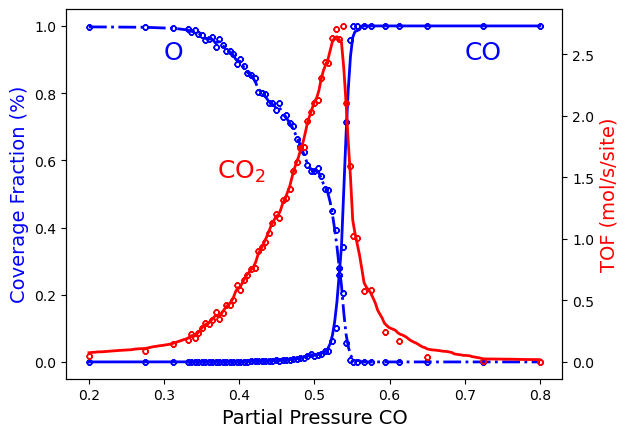

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()

x_CO_model = numpy.linspace(0.2,0.8,201)
ac_O_model,ac_CO_model,TOF_CO2_model = adpML.predict( x_CO_model ).T

ax = plt.axes()
ax.set_xlabel('Partial Pressure CO', fontsize=14)

ax.set_ylabel("Coverage Fraction (%)", color="blue", fontsize=14)
ax.plot(x_CO_model, ac_O_model, color="blue", linestyle="-.", lw=2, zorder=1)
ax.plot(x_CO, ac_O, marker='$\u25EF$', color='blue', markersize=4, lw=0, zorder=1)
ax.plot(x_CO_model, ac_CO_model, color="blue", linestyle="-", lw=2, zorder=2)
ax.plot(x_CO, ac_CO, marker='$\u25EF$', color='blue', markersize=4, lw=0, zorder=1)
plt.text(0.3, 0.9, 'O', fontsize=18, color="blue")
plt.text(0.7, 0.9, 'CO', fontsize=18, color="blue")

ax2 = ax.twinx()
ax2.set_ylabel("TOF (mol/s/site)",color="red", fontsize=14)
ax2.plot(x_CO_model, TOF_CO2_model, color='red', linestyle='-', lw=2, zorder=0)
ax2.plot(x_CO, TOF_CO2, marker='$\u25EF$', color='red', markersize=4, lw=0, zorder=1)
plt.text(0.37, 1.5, 'CO$_2$', fontsize=18, color="red")

plt.show()

In [11]:
scm.pyzacros.finish()

[27.01|15:09:56] PLAMS run finished. Goodbye
